# Part 1 - Constructing simple CSG geometry

To perform a neutronics simulation the geometry of the model must be defined. The simplest way to do this is to use Constructive Solid Geometry (CSG) which involves using primitive shapes and boolean operations to create cells and void spaces.

This python notebook allows users to make a simple CSG using OpenMC and plot 2D slices of the geometry.

In [ ]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/Ovr7oYukYRw", width=560, height=340)

This first code block creates a simple spherical shell geometry by defining two spherical surfaces at different radii. The region between the two surfaces is then defined and a cell created which is added to the geometry 'universe'.

Run the cell to produce three 2D slices of the geometry in different planes.

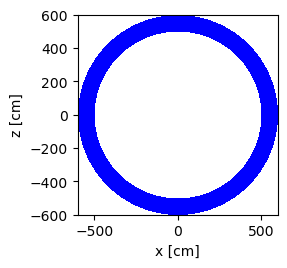

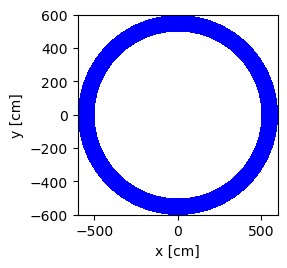

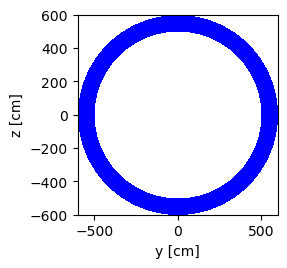

In [1]:
import openmc

# example surfaces
inner_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600)

# above (+) inner_sphere_surface and below (-) outer_sphere_surface
blanket_region = +inner_sphere_surface & -outer_sphere_surface  

# example cell
blanket_cell = openmc.Cell(region=blanket_region)

# makes a universe to cotain all the cells
geometry = openmc.Geometry([blanket_cell])  

# shows the plots, as the geometry is symmetrical the plots look the same
color_assignment = {blanket_cell: 'blue'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

The next code block adds a firstwall cell to the inner surface of the spherical shell.

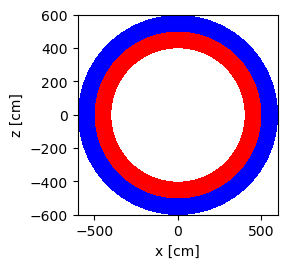

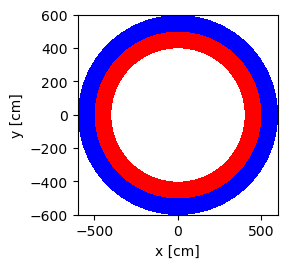

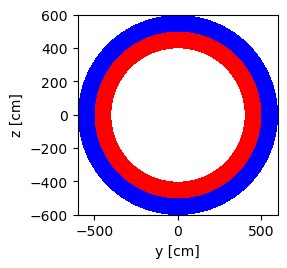

In [2]:
# example surfaces
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500) # note the extra surface
outer_sphere_surface = openmc.Sphere(r=600)

# above (+) middle_sphere_surface and below (-) outer_sphere_surface
blanket_region = +middle_sphere_surface & -outer_sphere_surface
# above (+) inner_sphere_surface and below (-) middle_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface

# now we have two cells
blanket_cell = openmc.Cell(region=blanket_region)
firstwall_cell = openmc.Cell(region=firstwall_region)

# there are now two cells in the list
geometry = openmc.Geometry([blanket_cell, firstwall_cell])  

# shows the plots, which still look the same for all directions
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

When creating CSG there is another key aspect of the geometry required when we want to use it to simulate particle movement and interactions - the entire geometry must be defined.

As well as defining the cells which contain materials, we must also define areas of the geometry with no materials, which are also called 'voids'. By default, cells are all voids until a material is assigned to those cells.

Also, the outermost surface must be identified with the boundary_type='vacuum' keyword which tells OpenMC to not compute the movement of particles beyond this surface.

The next code block shows how void regions and a vacuum boundary can be defined.

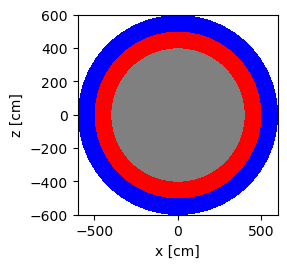

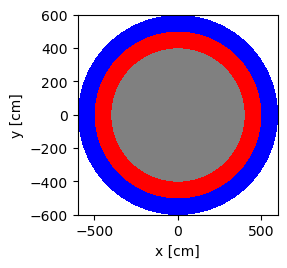

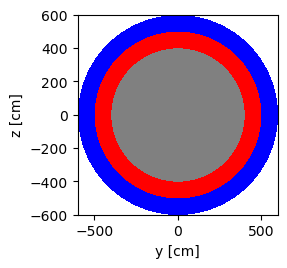

In [3]:
# surfaces
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum') # note the extra keyword, last surface of the geometry

# regions
blanket_region = +middle_sphere_surface & -outer_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface
inner_vessel_region = -inner_sphere_surface # this is the void region

# cells
blanket_cell = openmc.Cell(region=blanket_region)
firstwall_cell = openmc.Cell(region=firstwall_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region) # here as the cell is th new void cell, the other cells will be assigned materials in the next step

geometry = openmc.Geometry([blanket_cell, firstwall_cell, inner_vessel_cell])

color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red', inner_vessel_cell:'grey'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', colors=color_assignment)
plot.figure.savefig('yz-cell.png')

Assigning materials to cells is also necessary when wanting to use the geometry for particle transport.

Material creation was covered in Task 2 so these are just minimal materials to demonstrate material assignment to cells.

Additionally, this plot uses the color_by='material' argument to colour the plots by materials instead of cells.

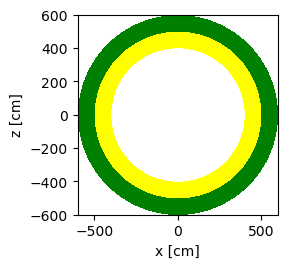

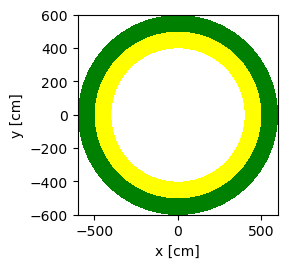

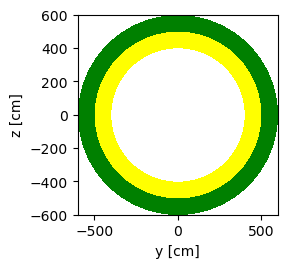

In [4]:
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600)

blanket_region = +middle_sphere_surface & -outer_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface
inner_vessel_region = -inner_sphere_surface # this is the void region, it will not have a material

openmc.config['cross_sections'] = '/home/nuclearkid/openmc_conda/openmc_data/endfb80/endfb-viii.0-hdf5/cross_sections.xml'
# This makes a minimal material 
lithium_mat = openmc.Material(name='lithium')
lithium_mat.set_density('g/cm3', 2)
lithium_mat.add_element('Li', 1.0)

# This makes another minimal material 
tungsten_mat = openmc.Material(name='tungsten')
tungsten_mat.set_density('g/cm3', 19)
tungsten_mat.add_element('W', 1.0)

blanket_cell = openmc.Cell(region=blanket_region)
blanket_cell.fill = lithium_mat  # this assigns a material to a cell

firstwall_cell = openmc.Cell(region=firstwall_region)
firstwall_cell.fill = tungsten_mat  # this assigns a material to a cell

inner_vessel_cell = openmc.Cell(region=inner_vessel_region)
# note there is no material assignment here as the cell a void cell

geometry = openmc.Geometry([blanket_cell, firstwall_cell, inner_vessel_cell])  

# note the new color scheme is uses material objects as dictionary keys and not not cell objects
color_assignment = {lithium_mat: 'green', tungsten_mat: 'yellow'}

# note the additional argument color_by, normally this defaults to 'cell'

plot = geometry.plot(basis='xz', color_by='material', colors=color_assignment)
plot.figure.savefig('xz-material.png')

plot = geometry.plot(basis='xy', color_by='material',  colors=color_assignment)
plot.figure.savefig('xy-material.png')

plot = geometry.plot(basis='yz', color_by='material',  colors=color_assignment)
plot.figure.savefig('yz-material.png')

**Learning Outcomes for Part 1:**

- Construction of simple Constructive Solid Geometry (CSG) geometry.
- Visualisation of models using 2D slices.
- Assigining materials to cells.
- Defining the complete geometry including void cells.
- Defining the edge of the model with the boundary keyword.
- Coloring models by cell or by material.

Additonal notes.

The geometry.plot method has lots of useful arguments that can be passed in.

Try adding ```outline=True``` to the geometry.plot() method and spot the difference.

Take a look at the documentation for more information

https://docs.openmc.org/en/latest/pythonapi/generated/openmc.Geometry.html#openmc.Geometry.plot